# PySAL (Python Spatial Analysis Library)
*Notebook 4 of 5*

PySAL is an open-source library in Python that facilitates spatial data analysis. If you're diving into PySAL or simply want to understand its key offerings, here are some of the most important takeaways:

- **Comprehensive Toolset**: PySAL offers a vast array of tools for spatial data analysis. These tools can be broadly categorized into areas such as spatial econometrics, spatial statistics, visualization, spatial dynamics, and network analysis.

- **Modularity**: PySAL has adopted a modular structure, making it easier for users to install and use only the components they need. This means that instead of being a monolithic library, PySAL is now a federation of packages.

- **Interoperability**: PySAL can work seamlessly with other popular Python libraries like geopandas, pandas, and matplotlib, thereby allowing users to integrate spatial analysis within broader data science workflows.

- **Exploratory Spatial Data Analysis (ESDA)**: One of the core strengths of PySAL is its capabilities in ESDA. It allows users to identify and visualize spatial autocorrelation, spatial hotspots, and other spatial patterns in their data.

- **Spatial Regression**: PySAL provides tools for spatial regression analysis, accommodating both spatial lag and spatial error models. This is crucial for cases where observations in your dataset are not independent but influenced by their neighbors.

- **Spatial Weights**: Constructing and handling spatial weights (which define relationships between observations based on criteria like contiguity or distance) is a foundational aspect of spatial analysis. PySAL offers robust tools for creating, managing, and manipulating these weights.

- **Spatial Dynamics**: PySAL contains tools to analyze spatial dynamics. This includes methods to study regional growth dynamics, spatial convergence, and mobility patterns.

- **Network Analysis**: Beyond traditional spatial analysis, PySAL also incorporates methods for spatial network analysis, useful for studying phenomena on networks, such as transportation systems.


## Problem
Imagine an oil and gas company that wants to understand if there is spatial autocorrelation in the productivity of its wells in a certain region. Specifically, they want to know if high-producing wells are clustered together or if they are randomly distributed.

## Steps:

1. **Data Collection**: 
   - Gather data on all the wells in the region. This would include the geographic location (latitude and longitude) and their production rate.

2. **Spatial Weights Matrix**: 
   - Using PySAL or a similar library, create a spatial weights matrix. This might be based on the k-nearest neighbors (where 'k' might be the 5 nearest wells, for instance).

3. **Spatial Autocorrelation Analysis**: 
   - With the weights matrix in place, compute the Global Moran's I statistic. This is a measure of overall spatial autocorrelation. A positive value indicates clustering of similar values, a negative value indicates dispersion, and a value close to zero indicates randomness.

4. **Visualize the Results**: 
   - Using Python libraries like geopandas and matplotlib, plot a map of the region, color-coding the wells based on production. Additionally, visualize clusters of high and low production using Local Moran's I or Local Indicators of Spatial Association (LISA) which indicates local spatial autocorrelation.

5. **Interpretation**: 
   - If a significant positive spatial autocorrelation is found, it might suggest that there are underlying geological factors leading to pockets of high productivity. This could guide further exploration and drilling activities.


In [16]:
pip install pandas pysal

     -------------------------------------- 40.8/40.8 kB 956.1 kB/s eta 0:00:00
     -------------------------------------- 132.4/132.4 kB 3.8 MB/s eta 0:00:00
     -------------------------------------- 275.7/275.7 kB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 58.4/58.4 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 112.9/112.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 41.8/41.8 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 141.3/141.3 kB ? eta 0:00:00
     ---------------------------------------

# Part 1: Data Collection & Spatial Weights Matrix

## Data Collection:
- The spatial data is loaded into a GeoDataFrame using the `geopandas` library.
- Geometric points are created by pairing the 'longitude' and 'latitude' columns of the given dataframe (`df`).
- These points are then set as the 'geometry' attribute of the GeoDataFrame.
- A glimpse of the spatial data is provided by printing the first few records.

## Spatial Weights Matrix:
- A spatial weights matrix, which defines the relationship or influence between pairs of locations, is created using the `pysal` library.
- The k-nearest neighbors method is employed for this purpose, where 'k' represents the number of nearest neighbors for each location. Here, 'k' is set to a minimum of 5 or one less than the total number of records.
- The neighbors for the first location (indexed at 0) are displayed as an example.



In [13]:
import pandas as pd

# Mock data
data = {
    'latitude': [34.5, 35.6, 36.7, 37.8, 38.9],
    'longitude': [-99.1, -98.2, -97.3, -96.4, -95.5],
    'production_rate': [100, 150, 200, 250, 300]
}

# Create a DataFrame from the mock data
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
#df.to_csv('wells_data.csv', index=False)

# Print out the DataFrame to verify
print(df)


   latitude  longitude  production_rate
0      34.5      -99.1              100
1      35.6      -98.2              150
2      36.7      -97.3              200
3      37.8      -96.4              250
4      38.9      -95.5              300


In [20]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import pysal as ps
from pysal.explore import esda
from pysal.lib import weights

# 1. Data Collection:

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf['geometry'] = gpd.points_from_xy(gdf.longitude, gdf.latitude)


# Display the first few records
print(gdf.head())

# 2. Spatial Weights Matrix:

# Create a spatial weights matrix based on the k-nearest neighbors
k = min(5, len(gdf) - 1)
weights = weights.KNN.from_dataframe(gdf, k=k)

# Display the neighbors for the first well (index 0)
print(weights[0])


   latitude  longitude  production_rate                    geometry
0      34.5      -99.1              100  POINT (-99.10000 34.50000)
1      35.6      -98.2              150  POINT (-98.20000 35.60000)
2      36.7      -97.3              200  POINT (-97.30000 36.70000)
3      37.8      -96.4              250  POINT (-96.40000 37.80000)
4      38.9      -95.5              300  POINT (-95.50000 38.90000)
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


A spatial weights matrix (often denoted as \( W \)) is a way to represent spatial relationships or connections between observations in a dataset. Each entry \( w_{ij} \) in this matrix indicates the relationship (or "weight") between observation \( i \) and observation \( j \).

In the context of the k-nearest neighbors (KNN) method you're using:

- If observation \( j \) is one of the \( k \) nearest neighbors of observation \( i \), then \( w_{ij} \) will have a non-zero value (often set to 1 for binary weights).
- If observation \( j \) is not one of the \( k \) nearest neighbors of observation \( i \), then \( w_{ij} \) will be zero.

In other words, the matrix provides a structured way to represent which observations are "connected" or "related" to each other based on the criterion used (in this case, proximity via KNN).

The `weights` object created using `weights.KNN.from_dataframe(gdf, k=k)` in PySAL is not a traditional matrix in the sense of a 2D array or a pandas DataFrame. Instead, it's a specialized object designed to efficiently store and manipulate these spatial relationships. When you access it, like with `weights[0]`, you're retrieving the neighbors of a specific observation, rather than a row of numbers.


# Part 2: Spatial Autocorrelation Analysis & Visualize the Results

Starting with the collection of spatial data and its conversion into a GeoDataFrame, the code then sets up a spatial weights matrix to establish relationships between data points based on their proximity. 

The core of the analysis is the computation of the Global Moran's I statistic, an essential metric to gauge the presence of spatial autocorrelation in our dataset. A positive value of this statistic suggests a clustering of similar values across the spatial data, while a negative value points towards a dispersion. 

Subsequently, the visualization section offers a compelling graphical representation of the spatial data, showcasing both the general well production and the clusters of high and low production. Such analyses provide valuable insights into spatial patterns and anomalies, crucial for fields like geography, urban planning, and environmental studies.


In [23]:
pip install pysal esda splot matplotlib geopandas


Note: you may need to restart the kernel to use updated packages.


Global Moran's I: -0.25
p-value: 0.001


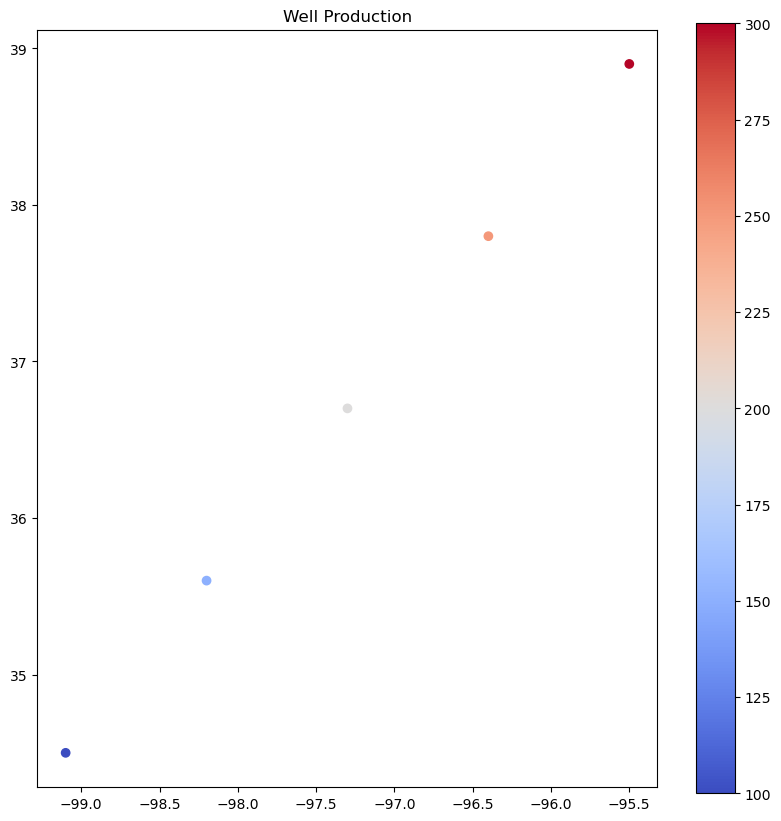

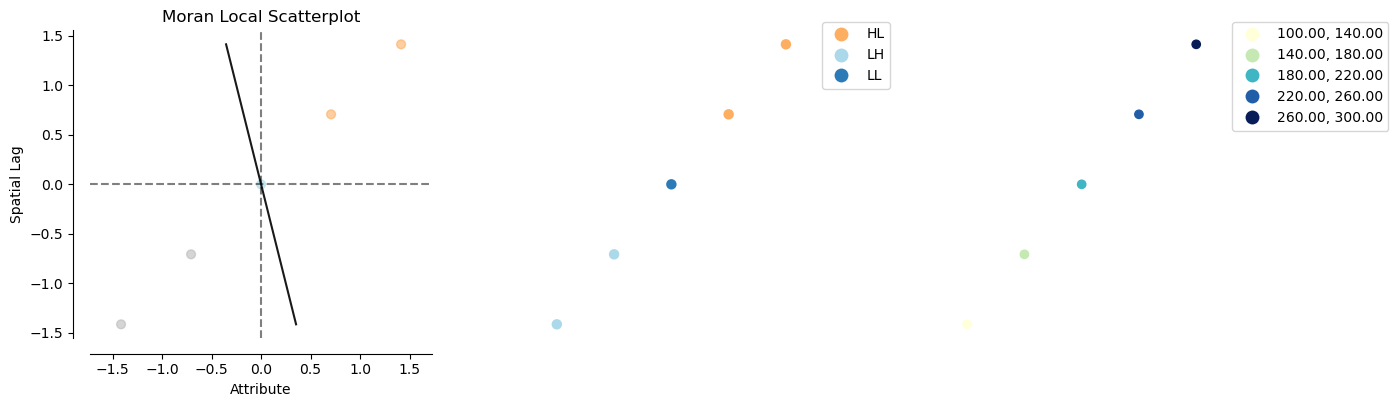

In [28]:
import matplotlib.pyplot as plt
from pysal.explore import esda
from splot.esda import plot_local_autocorrelation

# 3. Spatial Autocorrelation Analysis:

# Compute the Global Moran's I statistic
moran = esda.Moran(gdf['production_rate'], weights)
print(f"Global Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")

# 4. Visualize the Results:

# Plot a map of the region with wells color-coded by production
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='production_rate', cmap='coolwarm', legend=True, ax=ax)
ax.set_title('Well Production')
plt.show()

# Visualize clusters using Local Moran's I
local_moran = esda.Moran_Local(gdf['production_rate'], weights)

# Using splot for visualization of LISA (Local Indicators of Spatial Association)
plot_local_autocorrelation(local_moran, gdf, 'production_rate')
plt.show()


# 5. Interpretation

- **Positive Spatial Autocorrelation**: If the computed Global Moran's I is positive and its p-value (significance) is below the threshold (0.05 in this case), it indicates significant positive spatial autocorrelation. The interpretation suggests underlying geological factors leading to high productivity clusters.

- **Negative Spatial Autocorrelation**: If the Moran's I is negative with a significant p-value, it indicates significant negative spatial autocorrelation. This means high and low productivity areas are spread out.

- **No Significant Autocorrelation**: If neither condition is met, the code concludes that there's no significant spatial autocorrelation in the data.


In [29]:
# 5. Interpretation:

# Threshold for significance (commonly set at 0.05 or 0.01)
alpha = 0.05

if moran.I > 0 and moran.p_sim < alpha:
    print("Significant positive spatial autocorrelation detected.")
    print("This suggests that there are underlying geological factors leading to pockets of high productivity.")
    print("Further exploration and drilling activities in clusters of high productivity are recommended.")
elif moran.I < 0 and moran.p_sim < alpha:
    print("Significant negative spatial autocorrelation detected.")
    print("This indicates that high and low productivity areas are interspersed. Caution is advised for exploration activities.")
else:
    print("No significant spatial autocorrelation detected.")
    print("The production values appear to be distributed randomly across the spatial extent.")


Significant negative spatial autocorrelation detected.
This indicates that high and low productivity areas are interspersed. Caution is advised for exploration activities.
